# Part 1

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# import all given datasets 
Normal = pd.read_csv("Part1 - Normal.csv")
TypeH = pd.read_csv("Part1 - Type_H.csv")
TypeS = pd.read_csv("Part1 - Type_S.csv")

In [48]:
print("Normal dataset shape: ", Normal.shape)
print("Normal dataset size: ", Normal.size)
print("TypeH dataset shape: ", TypeH.shape)
print("TypeH dataset size: ", TypeH.size)
print("TypeS dataset shape: ", TypeS.shape)
print("TypeS dataset size: ", TypeS.size)

Normal dataset shape:  (100, 7)
Normal dataset size:  700
TypeH dataset shape:  (60, 7)
TypeH dataset size:  420
TypeS dataset shape:  (150, 7)
TypeS dataset size:  1050


In [49]:
merged_data = Normal.merge(TypeS, how = 'outer')
merged_data = merged_data.merge(TypeH, how = 'outer')
merged_data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,Type_H
306,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,Type_H
307,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,Type_H
308,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,Type_H


In [50]:
print("merged_data dataset shape: ", merged_data.shape)
print("merged_data dataset size: ", merged_data.size)

merged_data dataset shape:  (310, 7)
merged_data dataset size:  2170


In [51]:
merged_data.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [52]:
merged_data["Class"].unique()

array(['Normal', 'Nrmal', 'Type_S', 'tp_s', 'Type_H', 'type_h'],
      dtype=object)

In [53]:
merged_data.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [54]:
merged_data["Class"] = merged_data["Class"].replace("Nrmal", "Normal")
merged_data["Class"] = merged_data["Class"].replace("type_h", "Type_H")
merged_data["Class"] = merged_data["Class"].replace("tp_s", "Type_S")

In [55]:
 # detailed statistical analysis
merged_data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


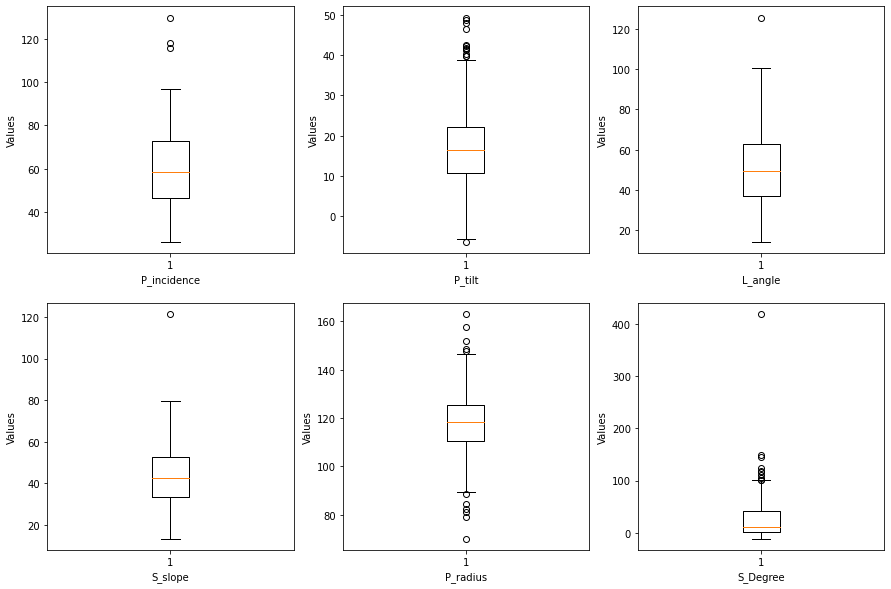

In [56]:
# Generically define how many plots along and across
ncols = 3
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(merged_data.columns):

            ax.boxplot(x = merged_data[merged_data.columns[counter]])
            ax.set_xlabel(merged_data.columns[counter])
            ax.set_ylabel('Values')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show() 

We observe that there are some outliers in case of P_tilt, P_radius and S_Degree and that S_Degree is positively skewed. 

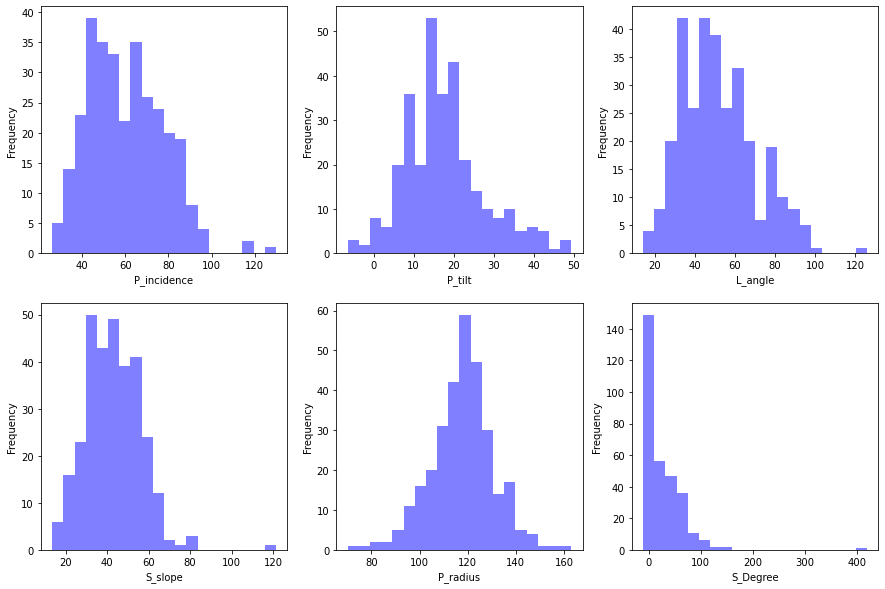

In [57]:
# Generically define how many plots along and across
ncols = 3
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(merged_data.columns):

            ax.hist(merged_data[merged_data.columns[counter]], bins=20, color='blue', alpha=0.5,
            label='{}'.format(merged_data.columns[counter]))
            ax.set_xlabel(merged_data.columns[counter])
            ax.set_ylabel('Frequency')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()
    

WE see a multimodal distribution for L_angle and P_incidence. Other distributions are roughly bell shaped.
S_Degree is heavily skewed.

In [58]:
merged_data.skew() # to measure the skewness of every attribute. 

P_incidence    0.520440
P_tilt         0.676553
L_angle        0.599451
S_slope        0.792577
P_radius      -0.176835
S_Degree       4.317954
dtype: float64

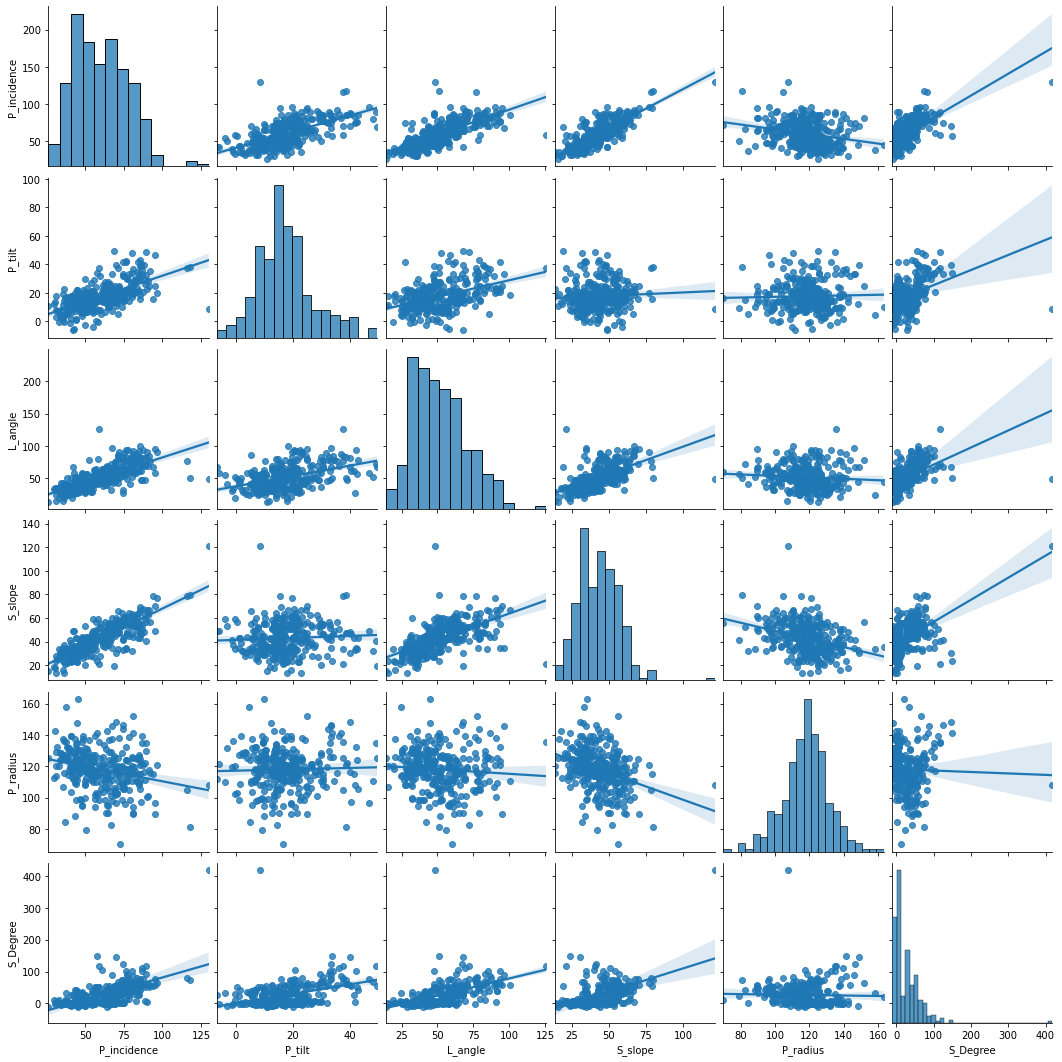

In [59]:
# bivariate analysis : pairplot.
sns.pairplot(merged_data, kind = "reg")

We observe some correlation in the variables in trying to visualise the data. Graphs of P_incidence vs L_angle and P_incidence vs S_Slope among others are moderately linear. 

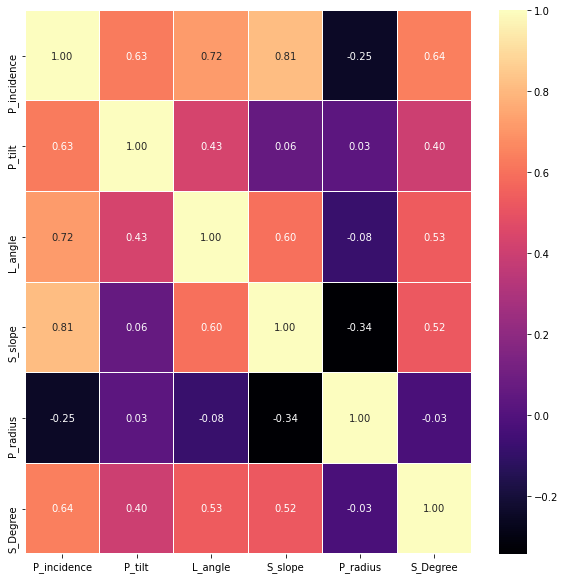

In [60]:
# bivariate analysis: heatmap for correlation plots.  
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(merged_data.corr(), ax = ax, annot = True, linewidth = 0.05, fmt = '0.2f', cmap = 'magma') # color intensity
plt.show()

Correlation heatmap of the independent variables. We see again that variables P_incidence vs L_angle and P_incidence vs S_Slope among others are highly correlated and that P_radius and S_slope are significantly negatively correlated. 

In [61]:
import sklearn.model_selection as ms
from imblearn.over_sampling import RandomOverSampler

In [62]:
X = merged_data[['P_incidence', 'P_tilt', 'L_angle', 'S_slope','P_radius', 'S_Degree']]
y = merged_data['Class']

In [63]:
mean = X.mean()
std = X.std()
X = (X - mean)/std

<AxesSubplot:xlabel='Class', ylabel='count'>

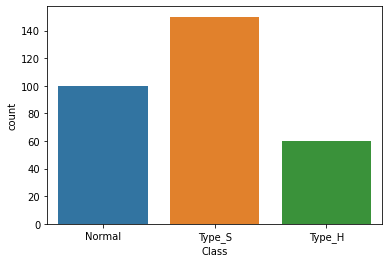

In [64]:
sns.countplot(x = y, data = y)

clearly, target data is imbalanced, since we combined it in numbers of 60:100:150. We balance it using random oversampling.  

In [65]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_over, y_over)

<AxesSubplot:xlabel='Class', ylabel='count'>

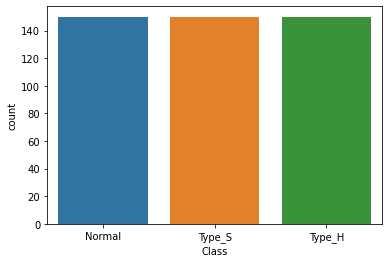

In [66]:
sns.countplot(x = y_over, data = y_over)

In [67]:
X_train, X_test, y_train, y_test = ms.train_test_split(X_over, y_over, test_size = 0.2, stratify = y_over, random_state=3)

In [68]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_train_pred = knn.predict(X_train)

# evaluate accuracy on training set
print("Training set accuracy: ", accuracy_score(y_train, y_train_pred))

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy on test set
print("Testing set accuracy: ", accuracy_score(y_test, y_pred))


Training set accuracy:  0.9333333333333333
Testing set accuracy:  0.7777777777777778


<AxesSubplot:>

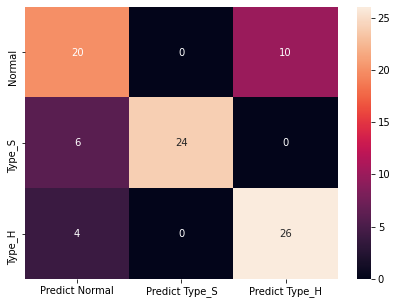

In [69]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred, labels=['Normal', 'Type_S', 'Type_H'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_S", "Type_H"]],
                  columns = [i for i in ["Predict Normal","Predict Type_S", "Predict Type_H"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Classification report can ber explained as follows:
. The True positives for each of the three classes dominate the heatmap
. Most significant misclassification error is of the Normal class predcted as Type_H
. The Type S was predicted with 100% accuracy, with 0 misclassifications. 

In [234]:
# creating odd list of K for KNN
myList = list(range(0,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [235]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
    print("for ",k,"neighbors, score is ", scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

for  1 neighbors, score is  0.9
for  3 neighbors, score is  0.8444444444444444
for  5 neighbors, score is  0.8222222222222222
for  7 neighbors, score is  0.8222222222222222
for  9 neighbors, score is  0.8444444444444444
for  11 neighbors, score is  0.8555555555555555
for  13 neighbors, score is  0.8777777777777778
for  15 neighbors, score is  0.8666666666666667
for  17 neighbors, score is  0.8555555555555555
for  19 neighbors, score is  0.8444444444444444
for  21 neighbors, score is  0.8444444444444444
for  23 neighbors, score is  0.8666666666666667
for  25 neighbors, score is  0.8555555555555555
for  27 neighbors, score is  0.8333333333333334
for  29 neighbors, score is  0.8333333333333334
for  31 neighbors, score is  0.8333333333333334
for  33 neighbors, score is  0.8444444444444444
for  35 neighbors, score is  0.8444444444444444
for  37 neighbors, score is  0.8333333333333334
for  39 neighbors, score is  0.8333333333333334
for  41 neighbors, score is  0.8444444444444444
for  43 neig

<AxesSubplot:>

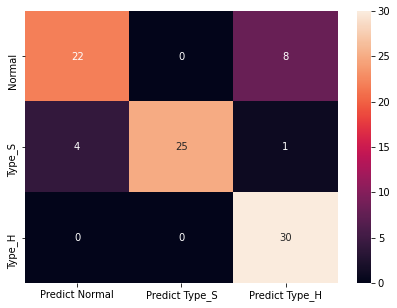

In [236]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred, labels=['Normal', 'Type_S', 'Type_H'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_S", "Type_H"]],
                  columns = [i for i in ["Predict Normal","Predict Type_S", "Predict Type_H"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The above model provides the highest accuracy score while having minimum misclassification for KNN classifiers. Thus it is the best model.

### Conclusion
We explored the shape and size of the given database, cleaned the data, performed detailed unvariate as well as bivariate statistical analysis on the data, and fit a KNN classifier upon the data, followed by the optimization of the classifier. We have obtained the best knn classifier in the search region. 

The following are the suggestions for the research team to perform better data analysis in the future:
1. Collecting more data points would help in better data analysis in the future.
2. Collecting equal number of data points for all classes assists in reducing oversampling of the data thereby making the data analysis more effective.
3. More data data features like age of the patient, etc. would help in providing a more accurate analysis. 

# Part 2

In [177]:
Data1 = pd.read_csv("Part2 - Data1.csv")
Data2 = pd.read_csv("Part2 -Data2.csv")

In [178]:
Data1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [179]:
Data2

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


In [180]:
print("Shape of data2 : ",Data2.shape)
print("size of data2 : ",Data2.size)
print("Shape of data1 : ",Data1.shape)
print("size of data1 : ",Data1.size)

Shape of data2 :  (5000, 7)
size of data2 :  35000
Shape of data1 :  (5000, 8)
size of data1 :  40000


In [181]:
Data = Data1.merge(Data2, on = "ID")

In [182]:
Data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [183]:
Data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [184]:
Data = Data.dropna(axis = 0, thresh = 14)

In [185]:
Data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [186]:
Data['ZipCode'] = Data['ZipCode'].astype('object')
Data['Security'] = Data['Security'].astype('object')
Data['FixedDepositAccount'] = Data['FixedDepositAccount'].astype('object')
Data['InternetBanking'] = Data['InternetBanking'].astype('object')
Data['CreditCard'] = Data['CreditCard'].astype('object')
Data.dtypes

<ipython-input-186-76c33f5eafa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['ZipCode'] = Data['ZipCode'].astype('object')
<ipython-input-186-76c33f5eafa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Security'] = Data['Security'].astype('object')
<ipython-input-186-76c33f5eafa4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                 object
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [187]:
Data.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [188]:
Data.describe()

,ID,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,LoanOnCard
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,2.395582,1.939536,1.880924,56.589759,0.096386
std,1438.011129,11.464212,11.468716,46.07009,1.147200,1.750006,0.840144,101.836758,0.295149
min,10.000000,23.000000,-3.000000,8.00000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,1.000000,0.700000,1.000000,0.000000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,2.000000,1.500000,2.000000,0.000000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,3.000000,2.525000,3.000000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.00000,4.000000,10.000000,3.000000,635.000000,1.000000


5 point summary of the data as well as the mean and standard deviation of the data features.  

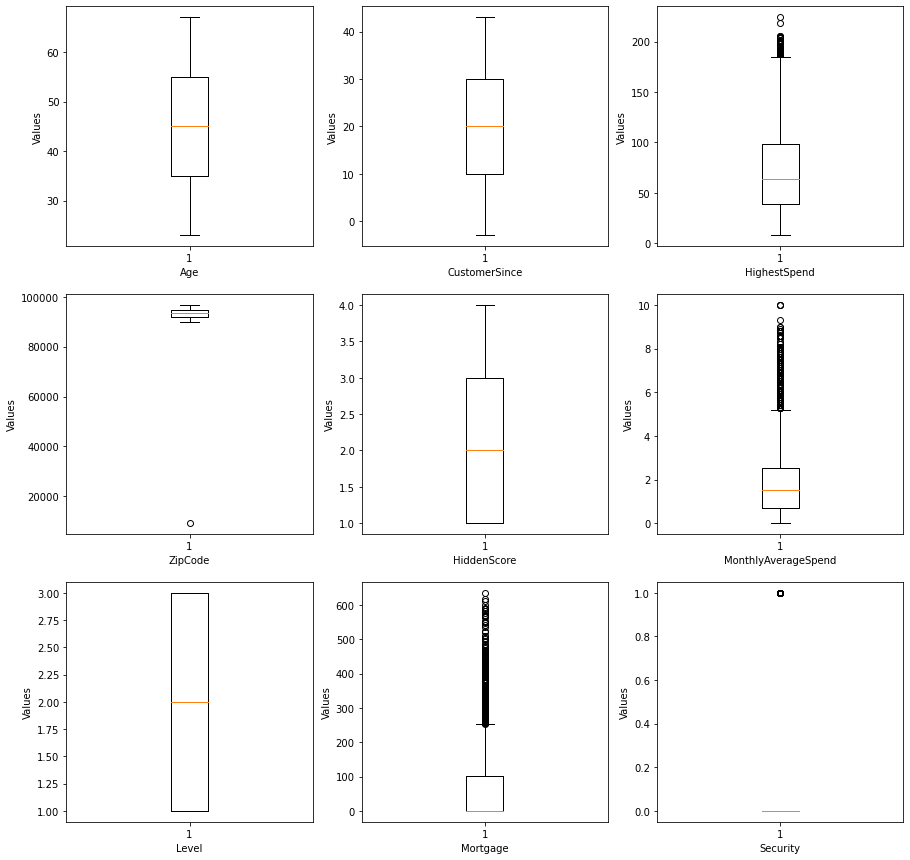

In [237]:
# Generically define how many plots along and across
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Lazy counter so we can remove unwanted axes
counter = 1
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(Data.columns):

            ax.boxplot(x = Data[Data.columns[counter]])
            ax.set_xlabel(Data.columns[counter])
            ax.set_ylabel('Values')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show() 

We see that data has high positive skew for features highestSpend, MonthlyAverageSpend, Mortgage and HiddenScore with large number of outliers in some cases. Features like age and customerSince are not skewed. 

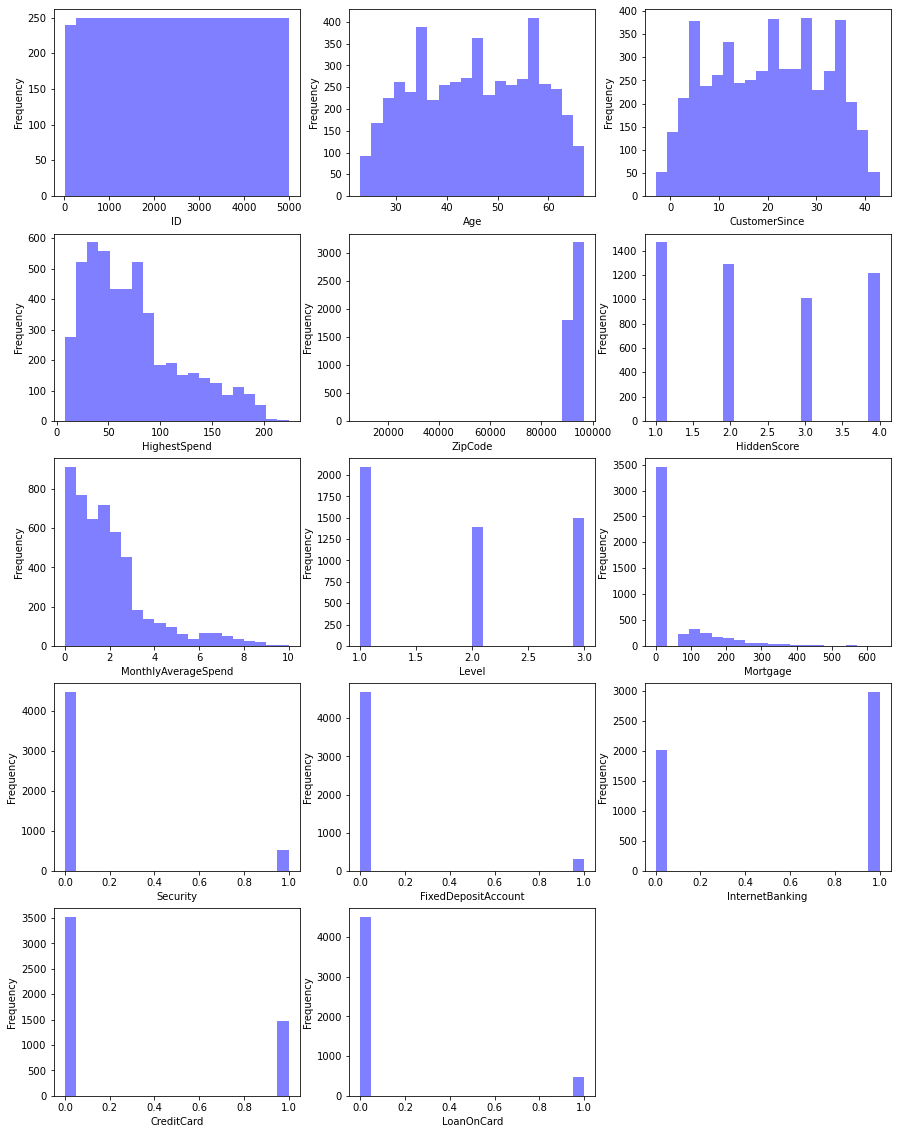

In [238]:
# Generically define how many plots along and across
ncols = 3
nrows = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(Data.columns):

            ax.hist(Data[Data.columns[counter]], bins=20, color='blue', alpha=0.5,
            label='{}'.format(Data.columns[counter]))
            ax.set_xlabel(Data.columns[counter])
            ax.set_ylabel('Frequency')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

The plot of ZipCode and ID should be ignored, since it is not a proper feature. Many of the obeseved are categorical features, hencejust 2/3/4 bars are visible. For the continuous variables, Age and CustomerSince are multimodal, whereas others skewed, roughly bell shaped distributions.  

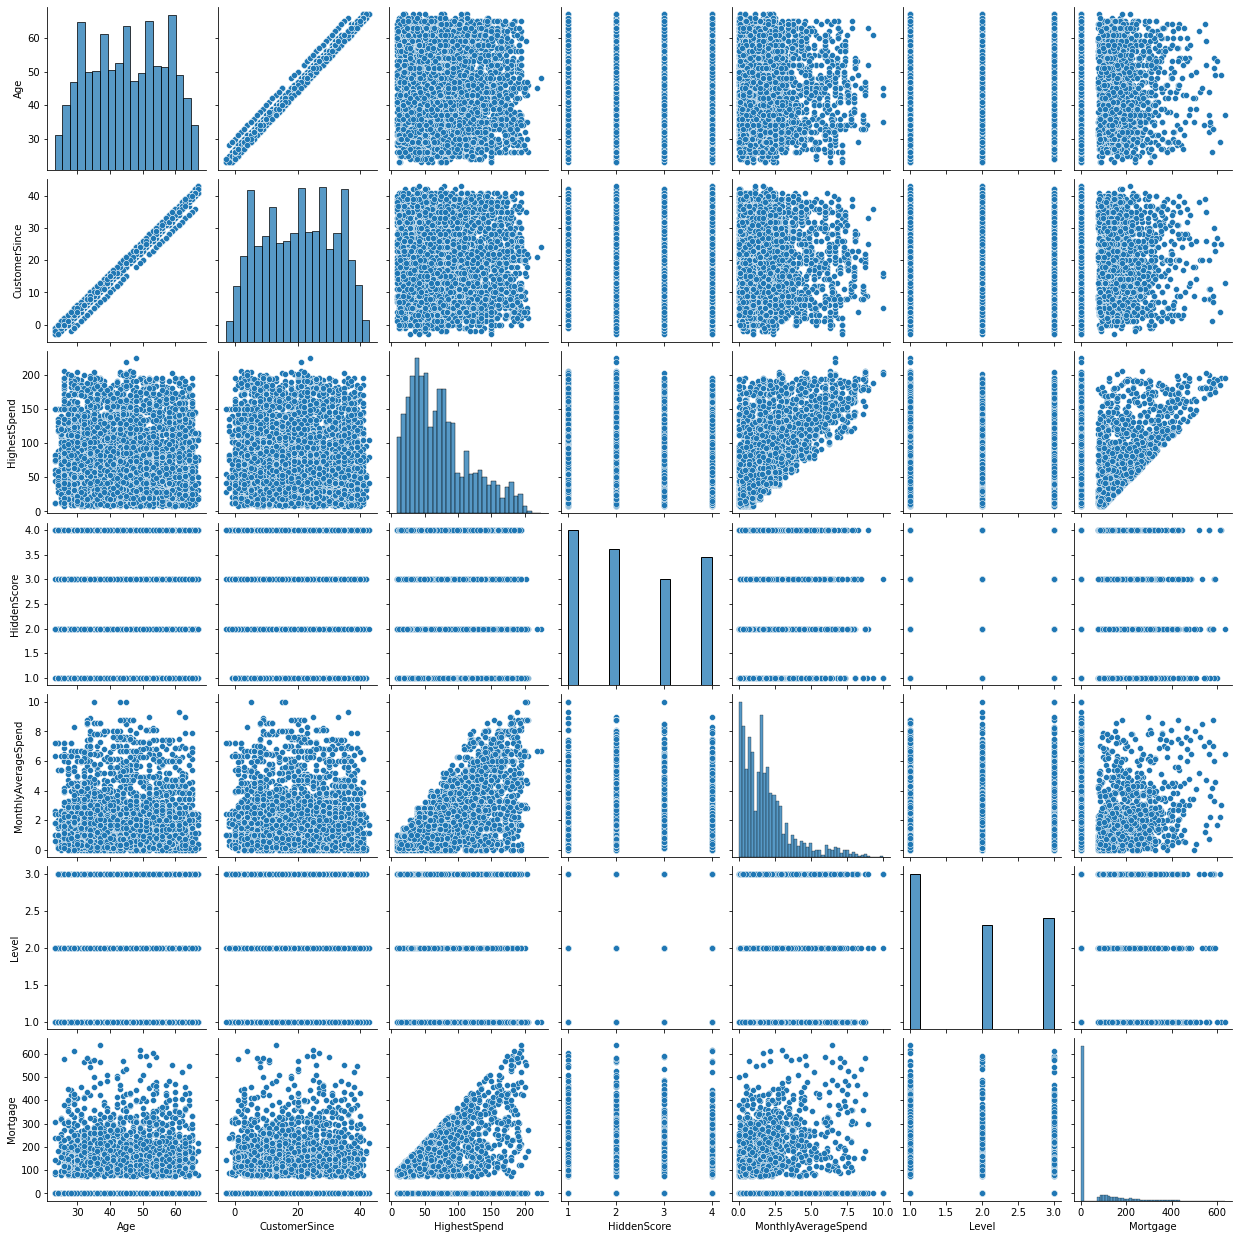

In [239]:
sns.pairplot(Data[['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage']])

We see that among the continuous variables, the plot of age vs CustomerSince is highly linear.
Among the other features curious observaions can be made such as the slanting boundary of points in case of Mortgage vs HighestScore.
Otherwise the points seem to be randomly distributed.

In [240]:
Data.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

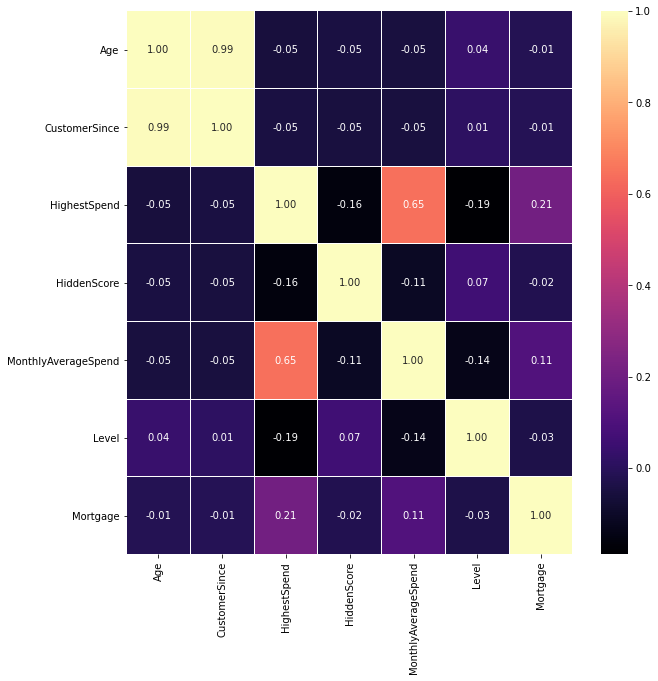

In [241]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(Data[['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage']].corr(), ax = ax, annot = True, linewidth = 0.05, fmt = '0.2f', cmap = 'magma') # color intensity
plt.show()

We can see that as per the previous graph, the age and CustomerSince vaiables are highly correlated. The Variables highestSpend vs MonthlyAverageSpend are also highly correlated. there is not much correlation observed among other variables.

In [242]:
X1 = Data[['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard']]
y1 = Data['LoanOnCard']

In [243]:
mean1 = X1.mean()
std1 = X1.std()
#X1 = (X1 - mean1)/std1
X1 = X1/std1

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

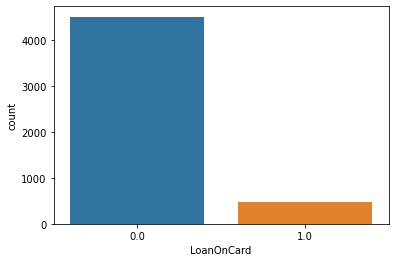

In [244]:
sns.countplot(x = y1, data = y1)

target attributes are clearly imbalanced. 

In [245]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over1, y_over1 = oversample.fit_resample(X1, y1)

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

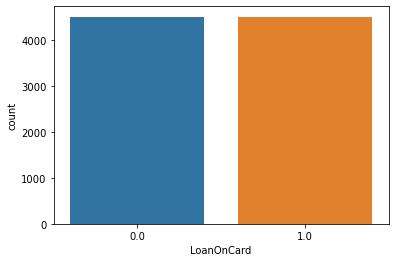

In [246]:
sns.countplot(x = y_over1, data = y_over1)

In [247]:
X_train1, X_test1, y_train1, y_test1 = ms.train_test_split(X_over1, y_over1, test_size = 0.2,
                                                           stratify = y_over1, random_state=3)

In [248]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [249]:
# Logistic Regression initial classifier
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train1, y_train1)
model_score_train = model.score(X_train1, y_train1)
print("training data model score:", model_score_train)
y_pred1 = model.predict(X_test1)


training data model score: 0.8947222222222222


In [250]:
model_score_test = model.score(X_test1, y_test1)
print("Testing Data model score: ", model_score_test)

Testing Data model score:  0.9005555555555556


<AxesSubplot:>

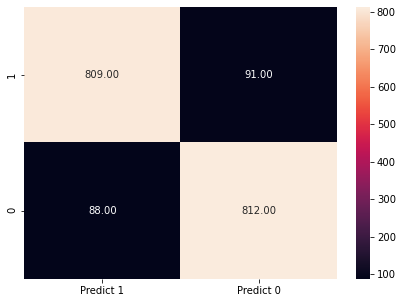

In [251]:
cm=metrics.confusion_matrix(y_test1, y_pred1, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = '0.2f')

the true positives and true negatives, almost equal in number, dominate the classification heatmap. Still, there are significant misclassification errors, that have not been reduced even after the optimization.

In [263]:
# Logistic regression parameter tuned version
model = LogisticRegression(solver = 'newton-cg', C = 0.01)
model.fit(X_train1, y_train1)
model_score_train = model.score(X_train1, y_train1)
print("training data model score:", model_score_train)
y_pred1 = model.predict(X_test1)

training data model score: 0.8969444444444444


In [264]:
model_score_test = model.score(X_test1, y_test1)
print("Testing Data model score: ", model_score_test)

Testing Data model score:  0.8961111111111111


<AxesSubplot:>

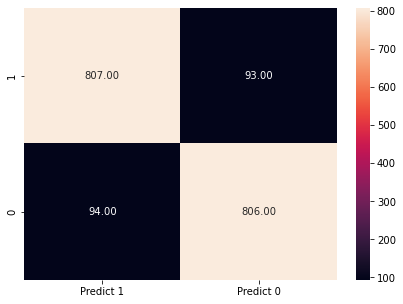

In [265]:
cm=metrics.confusion_matrix(y_test1, y_pred1, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = '0.2f')

this is the best logistic regression model, since after optimizing the parameters it gives the best results. 

In [266]:
NB_model = GaussianNB()

NB_model.fit(X_train1, y_train1)

GaussianNB()

In [267]:
y_pred2 = NB_model.predict(X_test1)

print("Accuracy score: {0:.4f}".format(metrics.accuracy_score(y_test1, y_pred2)))

Accuracy score: 0.8244


<AxesSubplot:>

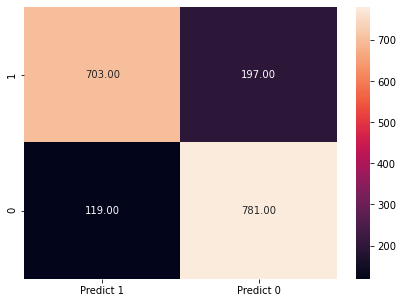

In [268]:
cm=metrics.confusion_matrix(y_test1, y_pred2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = '0.2f')

True positives and true negatives dominate the heatmap of misclassification error. 
The misclassification error has been significantly reduced after the optimization. 

In [258]:
NB_model = CategoricalNB(alpha = 0.001) # GaussianNB, MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB

NB_model.fit(X_train1, y_train1)

y_pred_train2 = NB_model.predict(X_train1)
print("Accuracy score: {0:.4f}".format(metrics.accuracy_score(y_train1, y_pred_train2)))

Accuracy score: 0.8882


In [259]:
y_pred2 = NB_model.predict(X_test1)

print("Accuracy score: {0:.4f}".format(metrics.accuracy_score(y_test1, y_pred2)))

Accuracy score: 0.8878


<AxesSubplot:>

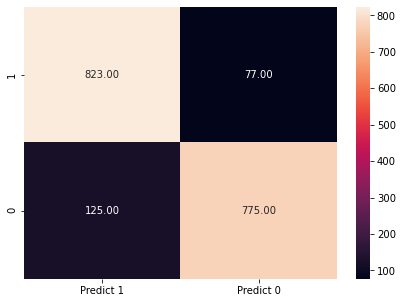

In [260]:
cm=metrics.confusion_matrix(y_test1, y_pred2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = '0.2f')

The above model gives the best possible outcome among the tested models, and hence is the best Naive Bayes classifier for this problem. Overall the logistic regression model performs slightly better and hence is the best model for the classification. 

### Conclusion
We imported the data, corrected the data types, corrected the null values, performed detailed univariate and multivariate statistical analysis, split the data into training and testing data and built and optimized Logistic regression and Naive Bayes classifiersupon the data. Thus we arrived at the best models for the given data. 

To perform a better data analysis in the future, we suggest the following to the bank:
1. Collect more data about bank account holders with credit cards, so that there is less imbalance in the dataset. 
2. More features in the dataset would help in improving the analysis. So collect more features.
3. Enter the complete data. This time we had to clean the dataset, losing valuable data points.